In [1]:
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mse_values = []
mae_values = []
weeks = ['15', '14', '13', '12', '10']

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
file = 'data/02-05 Hinded.xlsx'

In [5]:
def grades(row):
    if row['Kogutulemus (Punktid)'] > 90:
        return 5.0
    if row['Kogutulemus (Punktid)'] > 80:
        return 4.0
    if row['Kogutulemus (Punktid)'] > 70:
        return 3.0
    if row['Kogutulemus (Punktid)'] > 60:
        return 2.0
    if row['Kogutulemus (Punktid)'] > 50:
        return 1.0
    return 0.0

def pass_course(row):
    if row['Kogutulemus (Punktid)'] > 50:
        return 1.0
    return 0.0


def preprocess(filename, columns):
    
    # Changed VPL harjutus:Praktikumitöö esitamine (Punktid) columns to
    # VPL harjutus1:Praktikumitöö esitamine (Punktid)
    # VPL harjutus2:Praktikumitöö esitamine (Punktid)
    # VPL harjutus3:Praktikumitöö esitamine (Punktid)
    # ...
    # VPL harjutus15:Praktikumitöö esitamine (Punktid)
    
    df = pd.read_excel(filename)
    
    df['Grade'] = df.apply(lambda row: grades(row), axis=1)
    
    df['Pass'] = df.apply(lambda row: pass_course(row), axis=1)
    
    df = df.drop(['Eesnimi', 
                  'Perenimi', 
                  'ID-number', 
                  'Meiliaadress', 
                  'Sellest kursusest viimati alla laaditud', 
                  'Ülesanne:Näidiseksami logide ja video esitamine (Punktid)', 
                  'Kogutulemus (Punktid)',
                  'Hinne (Punktid)',
                  'Kodutööd kokku (Punktid)',
                  'Kontrolltööd kokku (Punktid)',
                  'Eksamile pääs (Punktid)',
                  'Eksam kokku (Punktid)',
                  'Test:8.01 eksami arvestuslik osa (Punktid)',
                  'Test:8.01 eksami punktilise osa 1. ülesanne (Punktid)',
                  'VPL harjutus:8.01 eksami punktilise osa 2. ja 3. ülesande esitamine (Punktid)',
                  'Ülesanne:8.01 eksami logide ja video esitamine (Punktid)',
                  'Test:14.01 eksami arvestuslik osa (Punktid)',
                  'Test:14.01 eksami punktilise osa 1. ülesanne (Punktid)',
                  'VPL harjutus:14.01 eksami punktilise osa 2. ja 3. ülesande esitamine (Punktid)',
                  'Ülesanne:14.01 eksami logide ja video esitamine (Punktid)',
                  'Test:27.01 eksami arvestuslik osa (Punktid)',
                  'Test:27.01 eksami punktilise osa 1. ülesanne (Punktid)',
                  'VPL harjutus:27.01 eksami punktilise osa 2. ja 3. ülesande esitamine (Punktid)',
                  'Ülesanne:27.01 eksami logide ja video esitamine (Punktid)',
                 ], axis=1)
    
    df = df.replace('-', 0.0)
    df = df.replace('arvestatud', 1.0)
    df = df.replace('mittearvestatud', 0.0)
    df = df.replace('jah', 1.0)
    df = df.replace('ei', 0.0)
    
    df = df.fillna(0.0)
    
    df_half = df[columns]
    
    return df, df_half

In [6]:
columns = [
        'Test:1. nädala test (Punktid)',
        'Test:2. nädala test (Punktid)',
        'Test:3. nädala test (Punktid)',
        'Test:4. nädala test (Punktid)',
        'Test:5. nädala test (Punktid)',
        'Test:6. nädala test (Punktid)',
        'Test:7. nädala test (Punktid)',
        'Test:8. nädala test (Punktid)',
        'Test:9. nädala test (Punktid)',
        'Test:10. nädala test (Punktid)',
        'VPL harjutus:1. nädala kodutöö (Punktid)',
        'VPL harjutus:2. nädala kodutöö (Punktid)',
        'VPL harjutus:3. nädala kodutöö (Punktid)',
        'VPL harjutus:4. nädala kodutöö (Punktid)',
        'VPL harjutus:5. nädala kodutöö (Punktid)',
        'VPL harjutus:7. nädala kodutöö (Punktid)',
        'VPL harjutus:8. nädala kodutöö (Punktid)',
        'VPL harjutus:9. nädala kodutöö (Punktid)',
        'VPL harjutus:10. nädala kodutöö (Punktid)',
        'VPL harjutus1:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus2:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus3:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus4:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus5:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus7:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus8:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus9:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus10:Praktikumitöö esitamine (Punktid)',
        'Ülesanne:Esita projekti kirjeldus (Punktid)',
        'Ülesanne:Projekti algversioon (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. kontrolltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. KT järeltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT järeltöö programmide esitamine (Punktid)',
        'Test:1. KT 5.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 5.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 5.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Test:1. KT 25.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 25.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 25.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Grade',
        'Pass'
    ]
df, df_half = preprocess(file, columns)

In [7]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Full database training
X_train = train.drop(['Grade', 'Pass'], axis=1)
y_train_grade = train[['Grade']]
y_train_pass = train[['Pass']]

X_test = test.drop(['Grade', 'Pass'], axis=1)
y_test_grade = test[['Grade']]
y_test_pass = test[['Pass']]

In [9]:
# Create a model
# SVR
model_grade =  SVR(C = 2.0, epsilon = 0.1)
model_pass =  SVR(C = 2.0, epsilon = 0.1)

model_grade.fit(X_train, y_train_grade)
model_pass.fit(X_train, y_train_pass)

SVR(C=2.0)

In [10]:
y_pred = model_grade.predict(X_test)

mse = mean_squared_error(y_test_grade, y_pred)
    
mae = mean_absolute_error(y_test_grade, y_pred)
    
acc = model_grade.score(X_test, y_test_grade)
    
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy: {acc}')

MSE: 0.43807892789778896
MAE: 0.4634826485193596
Accuracy: 0.8429210893416649


In [11]:
model_pass.score(X_test, y_test_pass)

0.773903288408432

In [12]:
# Implementing blending
# New validation data
train2, val = train_test_split(train, test_size=0.2, random_state=42)

X_train_2 = train2.drop(['Grade', 'Pass'], axis=1)
y_train_grade_2 = train2[['Grade']]

X_val = val.drop(['Grade', 'Pass'], axis=1)
y_val_grade = val[['Grade']]

# Create the models and train them
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

np.random.seed(1111) 
model1.fit(X_train_2, y_train_grade_2)

np.random.seed(1111) 
model2.fit(X_train_2, y_train_grade_2)

np.random.seed(1111) 
model3.fit(X_train_2, y_train_grade_2)

# Training set
model1_pred = model1.predict_proba(X_val)
model2_pred = model2.predict_proba(X_val)
model3_pred = model3.predict_proba(X_val)

train_blending = np.concatenate([model1_pred, model2_pred, model3_pred], axis = 1)

# Test set
model1_pred = model1.predict_proba(X_test)
model2_pred = model2.predict_proba(X_test)
model3_pred = model3.predict_proba(X_test)

test_blending = np.concatenate([model1_pred, model2_pred, model3_pred], axis = 1)

In [13]:
np.random.seed(1111) 

blending_model = SVC()
blending_model.fit(train_blending, y_val_grade)

SVC()

In [14]:
print(f'Accuracy of stacking ensemble {blending_model.score(test_blending, y_test_grade)*100}%')

Accuracy of stacking ensemble 43.47826086956522%


# Predicting grades by adding weekly values

## 10 week data

In [15]:
train_half, test_half = train_test_split(df_half, test_size=0.2, random_state=42)

X_train_half = train_half.drop(['Grade', 'Pass'], axis=1)
y_train_grade_half = train_half[['Grade']]

X_test_half = test_half.drop(['Grade', 'Pass'], axis=1)
y_test_grade_half = test_half[['Grade']]

In [16]:
# Implementing blending like in HW5
# New validation data
# On 10 week data

train2_half, val_half = train_test_split(train_half, test_size=0.2, random_state=42)

X_train_2_half = train2_half.drop(['Grade', 'Pass'], axis=1)
y_train_grade_2_half = train2_half[['Grade']]

X_val_half = val_half.drop(['Grade', 'Pass'], axis=1)
y_val_grade_half = val_half[['Grade']]

# Create the models and train them
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

np.random.seed(1111) 
model1.fit(X_train_2_half, y_train_grade_2_half)

np.random.seed(1111) 
model2.fit(X_train_2_half, y_train_grade_2_half)

np.random.seed(1111) 
model3.fit(X_train_2_half, y_train_grade_2_half)

# Training set
model1_pred = model1.predict_proba(X_val_half)
model2_pred = model2.predict_proba(X_val_half)
model3_pred = model3.predict_proba(X_val_half)

train_blending_half = np.concatenate([model1_pred, model2_pred, model3_pred], axis = 1)

# Test set
model1_pred = model1.predict_proba(X_test_half)
model2_pred = model2.predict_proba(X_test_half)
model3_pred = model3.predict_proba(X_test_half)

test_blending_half = np.concatenate([model1_pred, model2_pred, model3_pred], axis = 1)

In [17]:
np.random.seed(1111) 

blending_model_half = SVC()
blending_model_half.fit(train_blending_half, y_val_grade_half)

SVC()

In [18]:
print(f'Accuracy of stacking ensemble {blending_model_half.score(test_blending_half, y_test_grade_half)*100}%')

Accuracy of stacking ensemble 42.028985507246375%


In [19]:
# Create a model
# SVR
model_grade_half = SVR(C = 2.0, epsilon = 0.1)

model_grade_half.fit(X_train_half, y_train_grade_half)

SVR(C=2.0)

In [20]:
model_grade_half.score(X_test_half, y_test_grade_half)

0.4856076390211893

## 11 week data

In [21]:
columns = [
        'Test:1. nädala test (Punktid)',
        'Test:2. nädala test (Punktid)',
        'Test:3. nädala test (Punktid)',
        'Test:4. nädala test (Punktid)',
        'Test:5. nädala test (Punktid)',
        'Test:6. nädala test (Punktid)',
        'Test:7. nädala test (Punktid)',
        'Test:8. nädala test (Punktid)',
        'Test:9. nädala test (Punktid)',
        'Test:10. nädala test (Punktid)',
        'Test:11. nädala test (Punktid)',
        'VPL harjutus:1. nädala kodutöö (Punktid)',
        'VPL harjutus:2. nädala kodutöö (Punktid)',
        'VPL harjutus:3. nädala kodutöö (Punktid)',
        'VPL harjutus:4. nädala kodutöö (Punktid)',
        'VPL harjutus:5. nädala kodutöö (Punktid)',
        'VPL harjutus:7. nädala kodutöö (Punktid)',
        'VPL harjutus:8. nädala kodutöö (Punktid)',
        'VPL harjutus:9. nädala kodutöö (Punktid)',
        'VPL harjutus:10. nädala kodutöö (Punktid)',
        'VPL harjutus:11. nädala kodutöö (Punktid)',
        'VPL harjutus1:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus2:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus3:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus4:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus5:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus7:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus8:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus9:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus10:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus11:Praktikumitöö esitamine (Punktid)',
        'Ülesanne:Esita projekti kirjeldus (Punktid)',
        'Ülesanne:Projekti algversioon (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. kontrolltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. KT järeltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT järeltöö programmide esitamine (Punktid)',
        'Test:1. KT 5.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 5.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 5.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Test:1. KT 25.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 25.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 25.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Grade',
        'Pass'
    ]
df, df_11 = preprocess(file, columns)

df_11[['Videoloengud kokku (Punktid)']] = df[['Videoloengud kokku (Punktid)']]/16*11

In [22]:
train_11, test_11 = train_test_split(df_11, test_size=0.2, random_state=42)

X_train_11 = train_11.drop(['Grade', 'Pass'], axis=1)
y_train_grade_11 = train_11[['Grade']]


X_test_11 = test_11.drop(['Grade', 'Pass'], axis=1)
y_test_grade_11 = test_11[['Grade']]

In [23]:
# Create a model
# SVR
model_grade_11 =  SVR(C = 2.0, epsilon = 0.1)

model_grade_11.fit(X_train_11, y_train_grade_11)

SVR(C=2.0)

In [24]:
y_pred_11 = model_grade_11.predict(X_test_11)

mse = mean_squared_error(y_test_grade_11, y_pred_11)
    
mae = mean_absolute_error(y_test_grade_11, y_pred_11)
    
acc = model_grade_11.score(X_test_11, y_test_grade_11)
    
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy: {acc}')

MSE: 1.2719854997885525
MAE: 0.7896813754429518
Accuracy: 0.5439130166822338


## 12 week data

In [25]:
columns = [
        'Test:1. nädala test (Punktid)',
        'Test:2. nädala test (Punktid)',
        'Test:3. nädala test (Punktid)',
        'Test:4. nädala test (Punktid)',
        'Test:5. nädala test (Punktid)',
        'Test:6. nädala test (Punktid)',
        'Test:7. nädala test (Punktid)',
        'Test:8. nädala test (Punktid)',
        'Test:9. nädala test (Punktid)',
        'Test:10. nädala test (Punktid)',
        'Test:11. nädala test (Punktid)',
        'Test:12. nädala test (Punktid)',
        'VPL harjutus:1. nädala kodutöö (Punktid)',
        'VPL harjutus:2. nädala kodutöö (Punktid)',
        'VPL harjutus:3. nädala kodutöö (Punktid)',
        'VPL harjutus:4. nädala kodutöö (Punktid)',
        'VPL harjutus:5. nädala kodutöö (Punktid)',
        'VPL harjutus:7. nädala kodutöö (Punktid)',
        'VPL harjutus:8. nädala kodutöö (Punktid)',
        'VPL harjutus:9. nädala kodutöö (Punktid)',
        'VPL harjutus:10. nädala kodutöö (Punktid)',
        'VPL harjutus:11. nädala kodutöö (Punktid)',
        'VPL harjutus1:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus2:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus3:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus4:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus5:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus7:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus8:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus9:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus10:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus11:Praktikumitöö esitamine (Punktid)',
        'Ülesanne:Esita projekti kirjeldus (Punktid)',
        'Ülesanne:Projekti algversioon (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. kontrolltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. KT järeltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT järeltöö programmide esitamine (Punktid)',
        'Test:1. KT 5.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 5.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 5.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Test:1. KT 25.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 25.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 25.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Grade',
        'Pass'
    ]
df, df_12 = preprocess(file, columns)

df_12[['Videoloengud kokku (Punktid)']] = df[['Videoloengud kokku (Punktid)']]/16*12

In [26]:
train_12, test_12 = train_test_split(df_12, test_size=0.2, random_state=42)

X_train_12 = train_12.drop(['Grade', 'Pass'], axis=1)
y_train_grade_12 = train_12[['Grade']]


X_test_12 = test_12.drop(['Grade', 'Pass'], axis=1)
y_test_grade_12 = test_12[['Grade']]

In [27]:
# Create a model
# SVR
model_grade_12 =  SVR(C = 2.0, epsilon = 0.1)

model_grade_12.fit(X_train_12, y_train_grade_12)

SVR(C=2.0)

In [28]:
y_pred_12 = model_grade_12.predict(X_test_12)

mse = mean_squared_error(y_test_grade_12, y_pred_12)
    
mae = mean_absolute_error(y_test_grade_12, y_pred_12)
    
acc = model_grade_12.score(X_test_12, y_test_grade_12)
    
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy: {acc}')

MSE: 1.2509010688048958
MAE: 0.7877890632358951
Accuracy: 0.551473114280757


## 13 week data

In [29]:
columns = [
        'Test:1. nädala test (Punktid)',
        'Test:2. nädala test (Punktid)',
        'Test:3. nädala test (Punktid)',
        'Test:4. nädala test (Punktid)',
        'Test:5. nädala test (Punktid)',
        'Test:6. nädala test (Punktid)',
        'Test:7. nädala test (Punktid)',
        'Test:8. nädala test (Punktid)',
        'Test:9. nädala test (Punktid)',
        'Test:10. nädala test (Punktid)',
        'Test:11. nädala test (Punktid)',
        'Test:12. nädala test (Punktid)',
        'Test:13. nädala test (Punktid)',
        'VPL harjutus:1. nädala kodutöö (Punktid)',
        'VPL harjutus:2. nädala kodutöö (Punktid)',
        'VPL harjutus:3. nädala kodutöö (Punktid)',
        'VPL harjutus:4. nädala kodutöö (Punktid)',
        'VPL harjutus:5. nädala kodutöö (Punktid)',
        'VPL harjutus:7. nädala kodutöö (Punktid)',
        'VPL harjutus:8. nädala kodutöö (Punktid)',
        'VPL harjutus:9. nädala kodutöö (Punktid)',
        'VPL harjutus:10. nädala kodutöö (Punktid)',
        'VPL harjutus:11. nädala kodutöö (Punktid)',
        'VPL harjutus:13. nädala kodutöö (Punktid)',
        'VPL harjutus1:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus2:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus3:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus4:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus5:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus7:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus8:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus9:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus10:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus11:Praktikumitöö esitamine (Punktid)',
        'VPL harjutus13:Praktikumitöö esitamine (Punktid)',
        'Ülesanne:Esita projekti kirjeldus (Punktid)',
        'Ülesanne:Projekti algversioon (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. kontrolltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. kontrolltöö programmide esitamine (Punktid)',
        'Test:1. KT järeltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT järeltöö programmide esitamine (Punktid)',
        'Test:1. KT 5.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 5.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 5.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Test:1. KT 25.01 lisajäreltöö arvestuslik osa (Punktid)',
        'VPL harjutus:1. KT 25.01 lisajäreltöö programmide esitamine (Punktid)',
        'Ülesanne:1. KT 25.01 lisajäreltöö logide ja video esitamine (Punktid)',
        'Grade',
        'Pass'
    ]
df, df_13 = preprocess(file, columns)

df_13[['Videoloengud kokku (Punktid)']] = df[['Videoloengud kokku (Punktid)']]/16*13

In [30]:
train_13, test_13 = train_test_split(df_13, test_size=0.2, random_state=42)

X_train_13 = train_13.drop(['Grade', 'Pass'], axis=1)
y_train_grade_13 = train_13[['Grade']]


X_test_13 = test_13.drop(['Grade', 'Pass'], axis=1)
y_test_grade_13 = test_13[['Grade']]

In [31]:
# Create a model
# SVR
model_grade_13 =  SVR(C = 2.0, epsilon = 0.1)

model_grade_13.fit(X_train_13, y_train_grade_13)

SVR(C=2.0)

In [32]:
y_pred_13 = model_grade_13.predict(X_test_13)

mse = mean_squared_error(y_test_grade_13, y_pred_13)
    
mae = mean_absolute_error(y_test_grade_13, y_pred_13)
    
acc = model_grade_13.score(X_test_13, y_test_grade_13)
    
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'Accuracy: {acc}')

MSE: 1.223716830180338
MAE: 0.7801999980081823
Accuracy: 0.5612203774296889


# Predicting grades by removing weekly values

# Removing people who did the pre-exam and starting to remove data from the final weeks

In [33]:
# Full dataset with the basic columns removed
def accuracy(df):

    train, test = train_test_split(df, test_size=0.2, random_state=42)

    X_train = train.drop(['Grade', 'Pass'], axis=1)
    y_train = train[['Grade']]

    X_test = test.drop(['Grade', 'Pass'], axis=1)
    y_test = test[['Grade']]

    model_grade =  SVR(C = 2.0, epsilon = 0.1)
    model_grade.fit(X_train, y_train)
    
    y_pred = model_grade.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    mae = mean_absolute_error(y_test, y_pred)
    
    acc = model_grade.score(X_test, y_test)
    
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    return acc, mse, mae


### The original data the default removed columns

In [34]:
df, df_ = preprocess(file, columns)

acc, mse, mae = accuracy(df)

print(f'The accuracy on all students: {round(acc*100, 2)}%')

MSE: 0.43807892789778896
MAE: 0.4634826485193596
The accuracy on all students: 84.29%


### Remove the people who did the pre exam

In [35]:
df = df[df['Ülesanne:Eeleksamile registreerumine (Punktid)'] != 1.0]

to_drop = [
    'Ülesanne:Eeleksamile registreerumine (Punktid)',
    'Test:Eeleksami arvestuslik osa (Punktid)',
    'Ülesanne:Eeleksami punktiline osa (Punktid)'
]
df = df.drop(to_drop, axis=1)

acc, mse, mae = accuracy(df)

print(f'The accuracy on full-course students: {round(acc*100, 2)}%')

MSE: 0.4502856563292599
MAE: 0.47827785766043646
The accuracy on full-course students: 78.34%


## Removing lecture points and project total points

In [36]:
to_drop = [
    'Videoloengud kokku (Punktid)',
    'Projekt kokku (Punktid)',
    'Ülesanne:Projekti lõppversioon (Punktid)'
]
df = df.drop(to_drop, axis=1)

acc, mse, mae = accuracy(df)

mse_values.append(mse)
mae_values.append(mae)

print(f'The accuracy: {round(acc*100, 2)}%')

MSE: 0.4754370638771281
MAE: 0.4964940152636252
The accuracy: 77.13%


## Removing week 15

In [37]:
to_drop = [
    'VPL harjutus15:Praktikumitöö esitamine (Punktid)',
    'VPL harjutus:15. nädala kodutöö (Punktid)',
    'Test:15. nädala test (Punktid)',
    'Test:16. nädala test (Punktid)'
]

df = df.drop(to_drop, axis=1)

acc, mse, mae = accuracy(df)

mse_values.append(mse)
mae_values.append(mae)

print(f'The accuracy: {round(acc*100, 2)}%')

MSE: 0.479291332998964
MAE: 0.4998488073271409
The accuracy: 76.95%


## Removing week 14

In [38]:
to_drop = [
    'VPL harjutus14:Praktikumitöö esitamine (Punktid)',
    'VPL harjutus:14. nädala kodutöö (Punktid)',
    'Test:14. nädala test (Punktid)',
]

df = df.drop(to_drop, axis=1)

acc, mse, mae = accuracy(df)

mse_values.append(mse)
mae_values.append(mae)

print(f'The accuracy: {round(acc*100, 2)}%')

MSE: 0.4841619292301037
MAE: 0.5021542846362701
The accuracy: 76.71%


## Removing week 13

In [39]:
to_drop = [
    'VPL harjutus13:Praktikumitöö esitamine (Punktid)',
    'VPL harjutus:13. nädala kodutöö (Punktid)',
    'Test:13. nädala test (Punktid)',
]

df = df.drop(to_drop, axis=1)

acc, mse, mae = accuracy(df)

mse_values.append(mse)
mae_values.append(mae)

print(f'The accuracy: {round(acc*100, 2)}%')

MSE: 0.4875740180679553
MAE: 0.5044013299087683
The accuracy: 76.55%


## Removing week 12 and 11

In [40]:
to_drop = [
    'VPL harjutus11:Praktikumitöö esitamine (Punktid)',
    'VPL harjutus:11. nädala kodutöö (Punktid)',
    'Test:12. nädala test (Punktid)',
    'Test:11. nädala test (Punktid)',
    'Test:2. kontrolltöö arvestuslik osa (Punktid)',
    'VPL harjutus:2. kontrolltöö programmide esitamine (Punktid)',
    'Test:2. KT järeltöö arvestuslik osa (Punktid)',
    'VPL harjutus:2. KT järeltöö programmide esitamine (Punktid)',
    'Test:2. KT 6.01 lisajäreltöö arvestuslik osa (Punktid)',
    'VPL harjutus:2. KT 6.01 lisajäreltöö programmide esitamine (Punktid)',
    'Test:2. KT 26.01 lisajäreltöö arvestuslik osa (Punktid)',
    'VPL harjutus:2. KT 26.01 lisajäreltöö programmide esitamine (Punktid)',
]

df = df.drop(to_drop, axis=1)

acc, mse, mae = accuracy(df)

mse_values.append(mse)
mae_values.append(mae)

print(f'The accuracy: {round(acc*100, 2)}%')

MSE: 1.0797204063070767
MAE: 0.7214226801412928
The accuracy: 48.07%


# Graph for visualizing the growth of MSE and MAE

Text(0, 0.5, 'MAE')

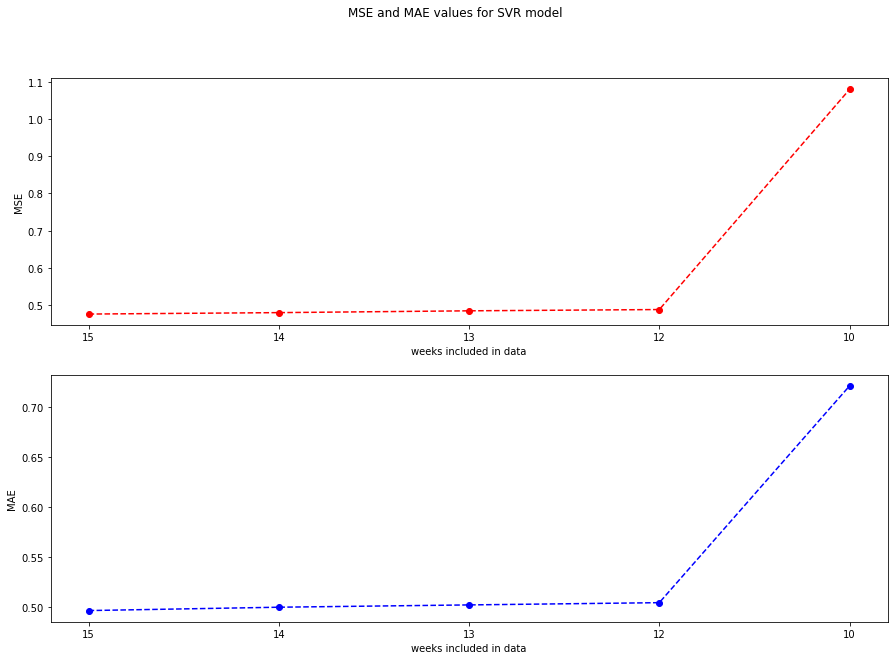

In [41]:
plt.rcParams["figure.figsize"] = (15,10)

fig, axs = plt.subplots(2)
fig.suptitle('MSE and MAE values for SVR model')
axs[0].plot(weeks, mse_values, 'ro--')
axs[1].plot(weeks, mae_values, 'bo--')

axs[0].set_xlabel('weeks included in data')
axs[1].set_xlabel('weeks included in data')

axs[0].set_ylabel('MSE')
axs[1].set_ylabel('MAE')

# Some results in an easier to read form:
#### If dropping these columns from the database <br>
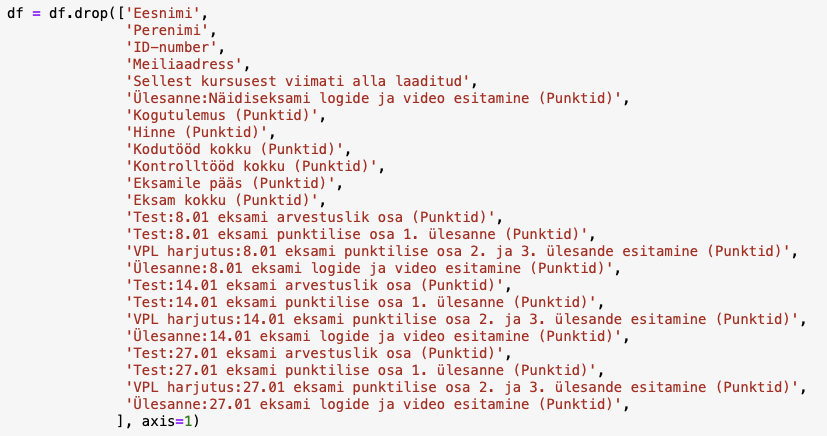

We can get a regression model SVR() with the following evaluations:<br>
MSE: 0.43807892789778896<br>
MAE: 0.4634826485193596<br>
Accuracy: 0.8429210893416649<br>
Which is quite good but it fails to give any real results due to the fact that it is basically predicting on already full points with a few features removed. <br>
Trying to use classification and a stacking ensamble fails and manages to get under 50% accuracy on both the full weekly dataset and also 10 week dataset. <br>

#### But removing all the students who took the pre-exam to pass the course, the regression model is then able to predict with an accuracy of 78%. With MSE: 0.45 and MAE: 0.48, the model can be considered quite good and useful for predicting the students' results before the exam. Even when removing lecture points, weeks 13-16, the model manages to retain an MSE: 0.488 and MAE: 0.504 with an accuracy of 76.55%.
#### After removing the week 12 data, the results drop a lot because the 6th week and 12th week tests play a big role in predicting the end grade for a student.
#### In conclusion, it is possible to predict the final grades after the 12th week and with good accuracy and low MSE / MAE, as the magnitude of error is quite low.


## Feature importance with a linear SVR kernel
Feature: 0, Score: -0.56932 <br>
Feature: 1, Score: -0.29239<br>
Feature: 2, Score: -0.44698<br>
Feature: 3, Score: 0.07447<br>
Feature: 4, Score: -0.33277<br>
Feature: 5, Score: -0.62865<br>
Feature: 6, Score: -0.69544<br>
Feature: 7, Score: -0.12646<br>
Feature: 8, Score: -0.50488<br>
Feature: 9, Score: -0.34373<br>
Feature: 10, Score: -0.05718<br>
Feature: 11, Score: -0.62606<br>
Feature: 12, Score: 0.13439<br>
Feature: 13, Score: -0.32403<br>
Feature: 14, Score: -0.55690<br>
Feature: 15, Score: -0.40671<br>
Feature: 16, Score: 0.38266<br>
Feature: 17, Score: 0.03854<br>
Feature: 18, Score: -0.05631<br>
Feature: 19, Score: -0.01423<br>
Feature: 20, Score: 0.26783<br>
Feature: 21, Score: -0.37423<br>
Feature: 22, Score: -0.34371<br>
Feature: 23, Score: -0.29454<br>
Feature: 24, Score: 0.11567<br>
Feature: 25, Score: 0.31616<br>
Feature: 26, Score: 0.39812<br>
<b>Feature: 27, Score: 0.99660</b><br>
Feature: 28, Score: 0.26780<br>
Feature: 29, Score: 0.36022<br>
Feature: 30, Score: 0.06819<br>
Feature: 31, Score: -0.00816<br>
Feature: 32, Score: -0.46840<br>
Feature: 33, Score: 0.09865<br>
Feature: 34, Score: -0.14645<br>
Feature: 35, Score: 0.04032<br>
Feature: 36, Score: 0.23945<br>
Feature: 37, Score: 0.25085<br>
Feature: 38, Score: -0.15019<br>
Feature: 39, Score: 0.73085<br>
Feature: 40, Score: -0.11563<br>
Feature: 41, Score: -0.10871<br>
Feature: 42, Score: -0.09047<br>
Feature: 43, Score: -0.06043<br>
Feature: 44, Score: 0.03780<br>
Feature: 45, Score: -0.00526<br>
Feature: 46, Score: 0.03254<br>
Feature: 47, Score: -1.34776<br>
Feature: 48, Score: 0.05485<br>
Feature: 49, Score: -1.18263<br>
Feature: 50, Score: 0.03013<br>
Feature: 51, Score: 0.00000<br>
Feature: 52, Score: 0.01806<br>
Feature: 53, Score: 0.00000<br>
Feature: 54, Score: 0.00000<br>
Feature: 55, Score: 0.05104<br>
Feature: 56, Score: 0.00000<br>
Feature: 57, Score: 0.22972<br>
Feature: 58, Score: 0.02166<br>
Feature: 59, Score: 0.21119<br>
Feature: 60, Score: 0.01951<br>
Feature: 61, Score: 0.24364<br>
Feature: 62, Score: 0.02470<br>
Feature: 63, Score: 0.00000<br>
Feature: 64, Score: -0.00097<br>
Feature: 65, Score: -0.00821<br>
Feature: 66, Score: 0.00000<br>
Feature: 67, Score: -0.97921<br>
Feature: 68, Score: -0.94723<br>
Feature: 69, Score: 0.06875<br>
Feature: 70, Score: -0.21158<br>
Feature: 71, Score: -0.03277<br>
Feature: 72, Score: 0.01133<br>
Feature: 73, Score: 0.00000<br>
Feature: 74, Score: -0.41092<br>
Feature: 75, Score: -0.03385<br>
Feature: 76, Score: 0.02489<br>
Feature: 77, Score: 0.00000<br>
Feature: 78, Score: -0.71852<br>
Feature: 79, Score: 0.00137<br>
Feature: 80, Score: 0.03623<br>
Feature: 81, Score: 0.00000<br>
Feature: 82, Score: 0.10734<br>
Feature: 83, Score: 0.08386<br>
Feature: 84, Score: -0.03067<br>
Feature: 85, Score: -0.03736<br>
Feature: 86, Score: -0.02743<br>
Feature: 87, Score: 0.03013<br>
Feature: 88, Score: -0.15785<br>
Feature: 89, Score: 0.00000<br>
Feature: 90, Score: 0.14048<br>
Feature: 91, Score: 0.05572<br>
Feature: 92, Score: 0.08009<br>
Feature: 93, Score: 0.02316<br>
Feature: 94, Score: 0.00000<br>
Feature: 95, Score: 0.00140<br>
Feature: 96, Score: 0.00567<br>
Feature: 97, Score: -0.04823<br>
Feature: 98, Score: 0.01992<br>
Feature: 99, Score: 0.00000<br>

## End of results predicting